# Cluster Analysis: Adding attribute weights

### 1. Load Packages

In [1]:
# Import the necesary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

###  2. Read Data and add extra data-point $S=8, CS=1$

In [2]:
# Read the data from the Cluster.csv file
df = pd.read_csv('../../../Data/Cluster.csv',index_col='T',parse_dates=True)
# Conver the data into an array
A = df.values
# Add a new value to the data
A = np.vstack([A, [8,1]])

### 3. Re-weight Data

In [3]:
# Scale data with 1/ std x sqrt(2)
weight = np.sqrt(2)*np.std(A,axis=0)
A_scaled = A/weight

### 4. K-means clustering

In [4]:
# Initialize Kmeans for 2 clusters and fit it to the data
k_means = KMeans(n_clusters=2, n_init=10,init='random')
k_means.fit(A_scaled)
labels = k_means.labels_
centers = k_means.cluster_centers_


### 5. Plot the results

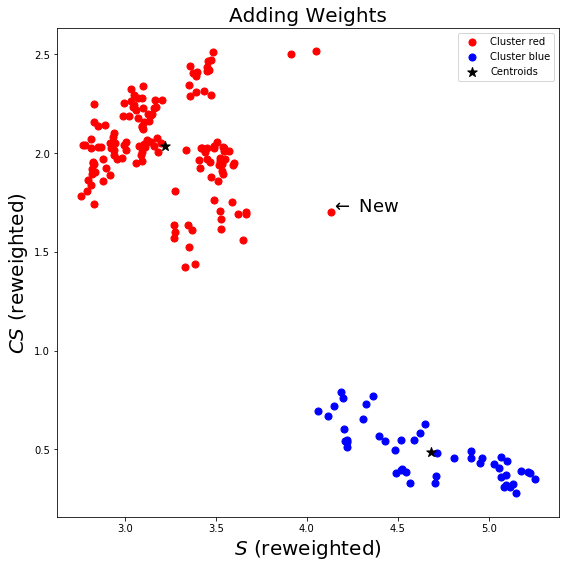

In [5]:
fig = plt.figure(figsize=[9,9])
# Select the elements on cluster = 1
idx_0 = labels ==1
plt.scatter(A_scaled[idx_0,0],A_scaled[idx_0,1],s=50,color='red',label='Cluster red')
# Select the elements in cluster = 0
idx_0 = labels ==0
plt.scatter(A_scaled[idx_0,0],A_scaled[idx_0,1],s=50,color='blue',label='Cluster blue')
# Plot the centroids of the clusters as black "*"
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=100,marker='*',color='black',label='Centroids')
plt.xlabel('$S$ (reweighted)',fontsize=20)
plt.ylabel('$CS$ (reweighted)',fontsize=20)
plt.title('Adding Weights',fontsize=20)
plt.annotate('$\leftarrow$ New',xy=(A_scaled[-1,0],A_scaled[-1,1]),fontsize=18)
plt.legend();

### 6. Using the appropriate axis

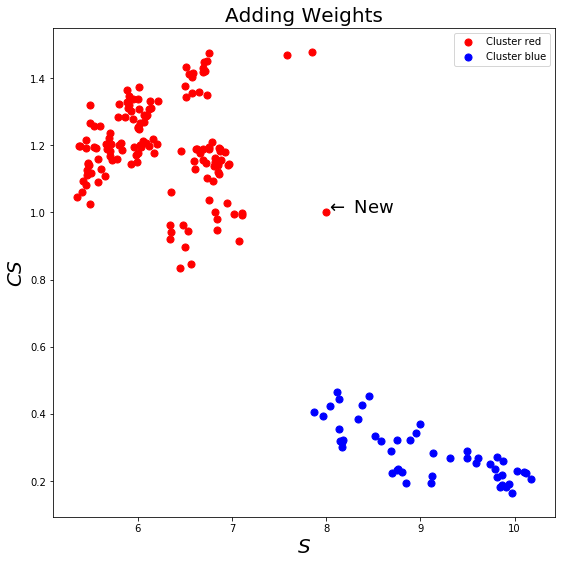

In [6]:
fig = plt.figure(figsize=[9,9])
# Plot both clusters but use A instead of A_scaled to return to its original dimention
idx_0 = labels ==1
# Plot cluster 1 with A
plt.scatter(A[idx_0,0],A[idx_0,1],s=50,color='red',label='Cluster red')
idx_0 = labels ==0
# Plot cluster 2 with A
plt.scatter(A[idx_0,0],A[idx_0,1],s=50,color='blue',label='Cluster blue')
plt.xlabel('$S$',fontsize=20)
plt.ylabel('$CS$',fontsize=20)
plt.title('Adding Weights',fontsize=20)
plt.annotate('$\leftarrow$ New',xy=(A[-1,0],A[-1,1]),fontsize=18)
plt.legend();

### 7. Categorizing new data using the predict function

In [7]:
# create a new data point
v = np.array([2,4], dtype=float)
v = v.reshape(1,2)
# Use the ".predict" method to clasiffy the point v
print('Predicted class is {k:0.0f}'.
format(k = k_means.predict(v)[0]))

Predicted class is 1
